

# Project: SOCCER DATABASE 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This **soccer database** comes from Kaggle and contains data for thousands of soccer matches, players, and teams from several European countries from 2008 to 2016. This dataset is quite extensive and well suited for data analysis.

> The database has the following tables:

>1. Country
2. League
3. Match
4. Player
5. Player_Attributes
6. Team
7. Team_Attributes.

>The tables will be joined together where appropriate to answer relevant questions that will be asked subsequently.


> This analysis seeks to look at how the team with the **highest number of home goals** creates chances and the techniques involed. Next we will seek to know the **overall best players** and then identify their unique attributes



In [1]:
# Imports statements for all the packages used

import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
% matplotlib notebook
sns.set_style('darkgrid')
# Create the connection
database = "database.sqlite"
connection = sql.connect(database)

#### Note
<div class="alert alert-block alert-info">
<b></b>The cell above imports the different packages which will be used in this report. It also creates a connection with the soccer database which will be the primary data fo all subsequent analysis.</div>

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, the data is loaded from the soccer database, checked for cleanliness, and then trimmed and cleaned for analysis. All steps will be documented and justified for easy reading and understanding. The Soccer data will now be loaded with the appropriate tables.


In [2]:
# This query loads the Country, League,  Match, Team and Team Attributes tables and joins them on the respective Primary
# and Foreign keys.

query = '''SELECT c.name AS country_name, l.name AS league_name, 
t.team_long_name AS team_name, ta.date AS dates,
ta.buildUpPlaySpeed AS build_up_play_speed, 
ta.chanceCreationPassing AS chance_creation_passing,
ta.chanceCreationPassingClass AS passing_class,
ta.chanceCreationCrossing AS chance_creation_crossing,
ta.chanceCreationCrossingClass AS crossing_class,
ta.chanceCreationShooting AS chance_creation_shooting,
ta.chanceCreationShootingClass AS shooting_class,
m.home_team_goal, m.away_team_goal
FROM Country c
JOIN League l
ON c.id = l.country_id
JOIN Match m
ON l.id = m.league_id
JOIN Team t
ON  t.team_api_id = m.home_team_api_id
LEFT JOIN Team_Attributes ta
ON t.id = ta.team_fifa_api_id
ORDER BY dates'''




In [3]:
# Data frame is defined and a connection is set up. 
# We explore the first few rows of the dataframe using df.head
df = pd.read_sql_query(query, connection)
df.head()

,country_name,league_name,team_name,dates,build_up_play_speed,chance_creation_passing,passing_class,chance_creation_crossing,crossing_class,chance_creation_shooting,shooting_class,home_team_goal,away_team_goal
0,Belgium,Belgium Jupiler League,Royal Excel Mouscron,None,NaN,NaN,None,NaN,None,NaN,None,0,1
1,Belgium,Belgium Jupiler League,RSC Anderlecht,None,NaN,NaN,None,NaN,None,NaN,None,2,3
2,Belgium,Belgium Jupiler League,RAEC Mons,None,NaN,NaN,None,NaN,None,NaN,None,0,0
3,Belgium,Belgium Jupiler League,KV Kortrijk,None,NaN,NaN,None,NaN,None,NaN,None,0,0
4,Belgium,Belgium Jupiler League,Royal Excel Mouscron,None,NaN,NaN,None,NaN,None,NaN,None,2,1


In [4]:
# Getting a summary of the loaded data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32069 entries, 0 to 32068
Data columns (total 13 columns):
country_name                32069 non-null object
league_name                 32069 non-null object
team_name                   32069 non-null object
dates                       7308 non-null object
build_up_play_speed         7308 non-null float64
chance_creation_passing     7308 non-null float64
passing_class               7308 non-null object
chance_creation_crossing    7308 non-null float64
crossing_class              7308 non-null object
chance_creation_shooting    7308 non-null float64
shooting_class              7308 non-null object
home_team_goal              32069 non-null int64
away_team_goal              32069 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 3.2+ MB


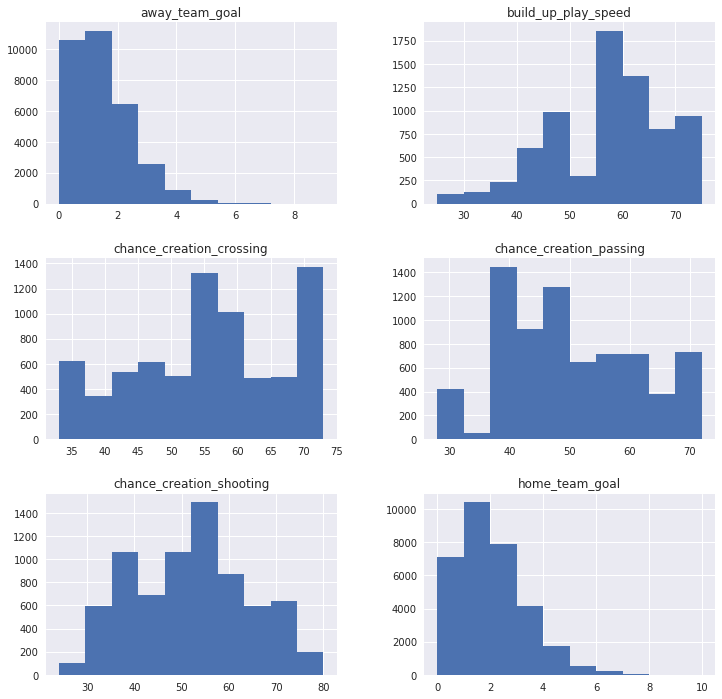

In [5]:
# Plot histograms for univariate analysis of columns and get an idea of the frequency of inputs
df.hist(figsize=(12,12));

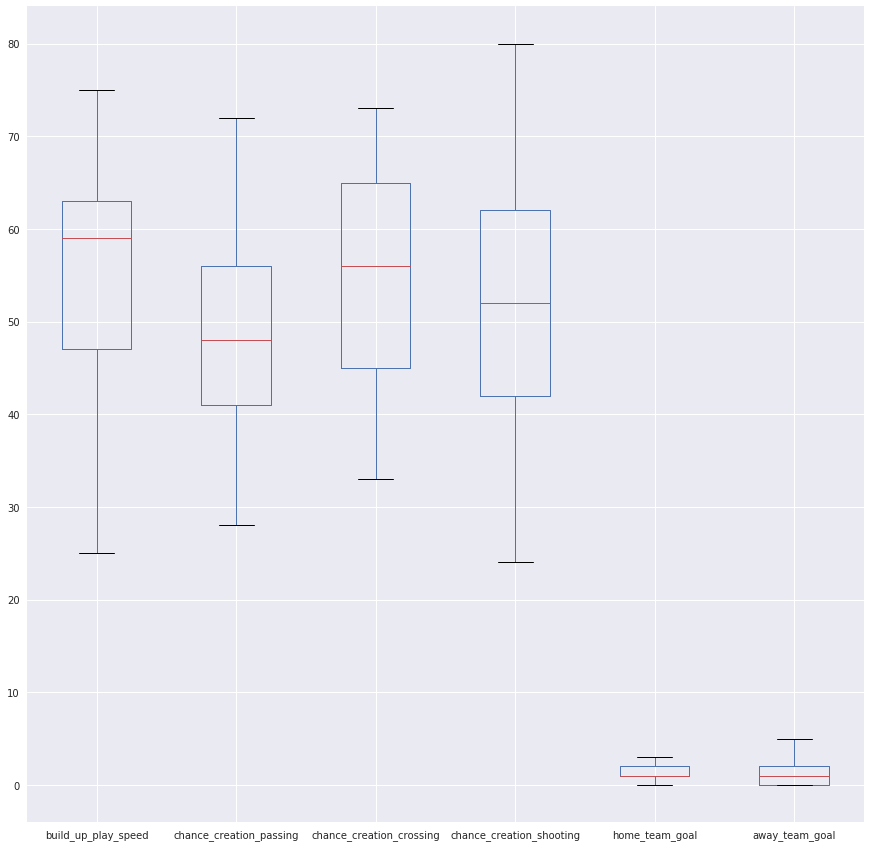

In [6]:
# Plot boxplot to visualize data statistical spread
df.boxplot(figsize=(15,15));

In [7]:
# Gets sum of all null values in each column
df.isnull().sum()

country_name                    0
league_name                     0
team_name                       0
dates                       24761
build_up_play_speed         24761
chance_creation_passing     24761
passing_class               24761
chance_creation_crossing    24761
crossing_class              24761
chance_creation_shooting    24761
shooting_class              24761
home_team_goal                  0
away_team_goal                  0
dtype: int64

In [8]:
# Get sum of the non zero entries
np.count_nonzero(df)

300155

<div class="alert alert-block alert-info">
<b>PRELIMINARY FINDINGS FOR TEAM TABLE:</b> 
 
1. The Tables Country, League, Match and Team were all joined and will be used as df. The tables and columns loaded where carefully chosen to aid in answering the specific questions asked.There are also columns that were not added from the original soccer data set as they are not relevant to the questions that have been asked and will not be included subsequently. Columns were renamed for easy exploration.

2. **The Data Frame has 32069 rows and 13 columns.**    

3. The info and null queries performed on the data set shows that there is a **total of 24761 missing values** in each of 8 columns of our data set.The rows with the missing values will be dropped from the data set.  Then there are column headings with a combination of upper and lower case letters which were changed to all lower case in the SQL query.

4. The histogram and box plot show the various spread of the columns </div>



## LOAD DATA FOR THE PLAYER AND PLAYER ATTRIBUTE TABLES

In [9]:
# This query loads the Player table and joins it with the Player_Attributes tables on the respective Primary and Foreign keys.
# The join performed is a left join
query = '''SELECT * FROM Player p JOIN Player_Attributes pa ON p.id = pa.player_api_id'''

In [10]:
# Data frame is defined and a connection is set up. 
# We explore the first few rows of the dataframe using df.head
df_player = pd.read_sql_query(query, connection)
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id,player_fifa_api_id,player_api_id,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,3264,39599,Federico Marchetti,139668,1983-02-07 00:00:00,187.96,183,452,51868,3264,...,66.0,41.0,30.0,34.0,36.0,13.0,7.0,7.0,9.0,13.0
1,3264,39599,Federico Marchetti,139668,1983-02-07 00:00:00,187.96,183,453,51868,3264,...,66.0,62.0,30.0,34.0,36.0,11.0,20.0,27.0,20.0,20.0
2,3264,39599,Federico Marchetti,139668,1983-02-07 00:00:00,187.96,183,454,51868,3264,...,66.0,62.0,30.0,34.0,36.0,11.0,20.0,27.0,20.0,20.0
3,3264,39599,Federico Marchetti,139668,1983-02-07 00:00:00,187.96,183,455,51868,3264,...,66.0,62.0,30.0,34.0,36.0,11.0,20.0,27.0,20.0,20.0
4,3264,39599,Federico Marchetti,139668,1983-02-07 00:00:00,187.96,183,456,51868,3264,...,66.0,62.0,30.0,34.0,36.0,11.0,20.0,27.0,20.0,20.0


In [11]:
# Getting a summary of player data frame
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 49 columns):
id                     1542 non-null int64
player_api_id          1542 non-null int64
player_name            1542 non-null object
player_fifa_api_id     1542 non-null int64
birthday               1542 non-null object
height                 1542 non-null float64
weight                 1542 non-null int64
id                     1542 non-null int64
player_fifa_api_id     1542 non-null int64
player_api_id          1542 non-null int64
date                   1542 non-null object
overall_rating         1534 non-null float64
potential              1534 non-null float64
preferred_foot         1534 non-null object
attacking_work_rate    1475 non-null object
defensive_work_rate    1534 non-null object
crossing               1534 non-null float64
finishing              1534 non-null float64
heading_accuracy       1534 non-null float64
short_passing          1534 non-null float64
volleys      

In [12]:
# Gets sum of all null values
df_player.isnull().sum()

id                      0
player_api_id           0
player_name             0
player_fifa_api_id      0
birthday                0
height                  0
weight                  0
id                      0
player_fifa_api_id      0
player_api_id           0
date                    0
overall_rating          8
potential               8
preferred_foot          8
attacking_work_rate    67
defensive_work_rate     8
crossing                8
finishing               8
heading_accuracy        8
short_passing           8
volleys                51
dribbling               8
curve                  51
free_kick_accuracy      8
long_passing            8
ball_control            8
acceleration            8
sprint_speed            8
agility                51
reactions               8
balance                51
shot_power              8
jumping                51
stamina                 8
strength                8
long_shots              8
aggression              8
interceptions           8
positioning 

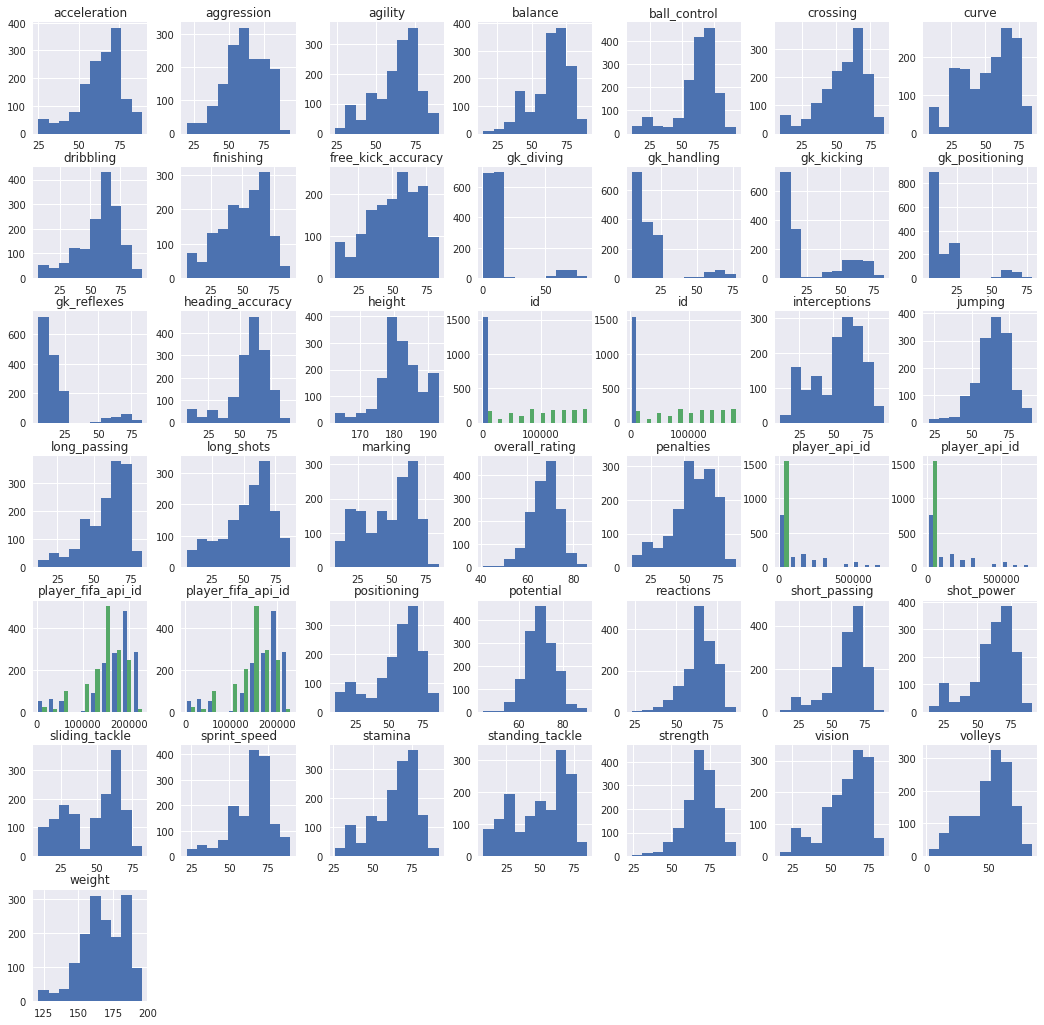

In [13]:
df_player.hist(figsize=(18,18));

In [14]:
df_player.describe()

,id,player_api_id,player_fifa_api_id,height,weight,id,player_fifa_api_id,player_api_id,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1534.000000,1534.000000,...,1491.000000,1534.000000,1534.000000,1534.000000,1491.000000,1534.000000,1534.000000,1534.00000,1534.000000,1534.000000
mean,6502.217899,169443.953307,169772.919585,181.501284,167.545396,100356.360571,146708.059014,6502.217899,67.479791,70.003259,...,59.954393,56.161669,47.319426,50.219687,47.439973,14.821382,17.494785,25.11734,16.839635,17.983051
std,2765.818823,182934.001915,54701.421127,6.417362,15.452809,52061.162391,41738.934593,2765.818823,6.395473,6.425192,...,14.692894,15.950181,18.825762,20.188172,19.755033,16.632693,15.769943,23.92406,15.490429,16.361928
min,2625.000000,11760.000000,1041.000000,162.560000,121.000000,452.000000,9003.000000,2625.000000,41.000000,44.000000,...,17.000000,11.000000,8.000000,8.000000,9.000000,1.000000,5.000000,5.00000,5.000000,5.000000
25%,3517.000000,33685.000000,153184.000000,177.800000,157.000000,63228.250000,137692.000000,3517.000000,64.000000,66.000000,...,52.000000,48.000000,30.000000,31.000000,25.000000,8.000000,8.000000,7.00000,9.000000,9.000000
50%,5710.000000,79742.000000,185004.000000,182.880000,168.000000,103708.500000,148196.000000,5710.000000,68.000000,70.000000,...,64.000000,58.000000,52.000000,55.000000,53.000000,10.000000,13.000000,13.00000,11.000000,14.000000
75%,8922.000000,278917.000000,207272.250000,185.420000,181.000000,142901.750000,179591.000000,8922.000000,72.000000,75.000000,...,71.000000,68.000000,63.000000,67.000000,65.000000,13.000000,20.000000,50.00000,20.000000,20.000000
max,11061.000000,719413.000000,231226.000000,193.040000,196.000000,181462.000000,208966.000000,11061.000000,86.000000,91.000000,...,85.000000,88.000000,85.000000,85.000000,82.000000,83.000000,77.000000,83.00000,79.000000,83.000000


<div class="alert alert-block alert-info">
<b>Preliminary Findings on Player Table:</b> 

1. The table has a total of 1542 rows and 49 columns
2. Many of the columns have missing values. Attacking work rate has the highest with 67 missing and lowest being 8 missing values
3. I intend to use those columns for my analysis so the rows with the missing values will be identified and dropped. Other columns that are also not relevant to the analysis will be dropped for ease 
4. The values in the overall and potential columns are floats which will be changed to integers.</div>




### Data Cleaning of Team Table

In [15]:
# Drop rows with null values
df.dropna(inplace=True)

In [16]:
# Get the new number of rows and columns after dropping those with null values
df.shape

(7308, 13)

In [17]:
# Checks if any column in the df has null values
df.isnull().sum().any()

False

In [18]:
# The values in the columns are converted from floats to integers
cols = ['build_up_play_speed', 'chance_creation_passing', 'chance_creation_crossing', 'chance_creation_shooting']
df[cols] = df[cols].applymap(np.int64)

In [19]:
# To confirm values have been converted from floats to integers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7308 entries, 24761 to 32068
Data columns (total 13 columns):
country_name                7308 non-null object
league_name                 7308 non-null object
team_name                   7308 non-null object
dates                       7308 non-null object
build_up_play_speed         7308 non-null int64
chance_creation_passing     7308 non-null int64
passing_class               7308 non-null object
chance_creation_crossing    7308 non-null int64
crossing_class              7308 non-null object
chance_creation_shooting    7308 non-null int64
shooting_class              7308 non-null object
home_team_goal              7308 non-null int64
away_team_goal              7308 non-null int64
dtypes: int64(6), object(7)
memory usage: 799.3+ KB


In [20]:
# Check for duplicates in df
sum(df.duplicated())

5532

In [21]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [22]:
# Check for duplicates to confirm
sum(df.duplicated())

0

In [23]:
# Check the number of columns and rows after dropping some
df.shape

(1776, 13)

<div class="alert alert-block alert-info">
<b>Data cleaning summary:</b>
    
The team table has been successfully cleaned and ready for EDA. 
1. Rows with null values have been dropped 
2. Rows with duplicate values of 5532 have been removed
3. Four columns with floats have been converted to integers. They are build_up_play_speed, chance_creation_passing, chance_creation_crossing, andchance_creation_shooting columns.</div>



### Data Cleaning for Player Table

In [24]:
# Remove column with identical values: id and player_api_id are the same
df_player.drop(['player_api_id'], axis=1, inplace=True)

In [25]:
# Remove column with identical values: id and player_api_id are the same
df_player.drop(['id'], axis=1, inplace=True)

In [26]:
df_player

,player_name,player_fifa_api_id,birthday,height,weight,player_fifa_api_id,date,overall_rating,potential,preferred_foot,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Federico Marchetti,139668,1983-02-07 00:00:00,187.96,183,51868,2010-08-30 00:00:00,62.0,73.0,right,...,66.0,41.0,30.0,34.0,36.0,13.0,7.0,7.0,9.0,13.0
1,Federico Marchetti,139668,1983-02-07 00:00:00,187.96,183,51868,2010-02-22 00:00:00,62.0,73.0,right,...,66.0,62.0,30.0,34.0,36.0,11.0,20.0,27.0,20.0,20.0
2,Federico Marchetti,139668,1983-02-07 00:00:00,187.96,183,51868,2009-08-30 00:00:00,62.0,73.0,right,...,66.0,62.0,30.0,34.0,36.0,11.0,20.0,27.0,20.0,20.0
3,Federico Marchetti,139668,1983-02-07 00:00:00,187.96,183,51868,2008-08-30 00:00:00,61.0,73.0,right,...,66.0,62.0,30.0,34.0,36.0,11.0,20.0,27.0,20.0,20.0
4,Federico Marchetti,139668,1983-02-07 00:00:00,187.96,183,51868,2007-02-22 00:00:00,61.0,73.0,right,...,66.0,62.0,30.0,34.0,36.0,11.0,20.0,27.0,20.0,20.0
5,Dragan Paljic,182740,1983-04-08 00:00:00,175.26,159,110809,2010-08-30 00:00:00,67.0,77.0,left,...,60.0,54.0,70.0,73.0,69.0,8.0,14.0,8.0,13.0,12.0
6,Dragan Paljic,182740,1983-04-08 00:00:00,175.26,159,110809,2009-08-30 00:00:00,73.0,77.0,left,...,60.0,68.0,79.0,78.0,69.0,8.0,21.0,73.0,21.0,21.0
7,Dragan Paljic,182740,1983-04-08 00:00:00,175.26,159,110809,2008-08-30 00:00:00,71.0,76.0,left,...,60.0,50.0,78.0,77.0,69.0,8.0,21.0,72.0,21.0,21.0
8,Dragan Paljic,182740,1983-04-08 00:00:00,175.26,159,110809,2007-08-30 00:00:00,72.0,76.0,left,...,60.0,51.0,77.0,77.0,69.0,8.0,21.0,71.0,21.0,21.0
9,Dragan Paljic,182740,1983-04-08 00:00:00,175.26,159,110809,2007-02-22 00:00:00,68.0,73.0,left,...,60.0,54.0,69.0,68.0,69.0,8.0,8.0,71.0,7.0,12.0


In [27]:
# Get 
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 45 columns):
player_name            1542 non-null object
player_fifa_api_id     1542 non-null int64
birthday               1542 non-null object
height                 1542 non-null float64
weight                 1542 non-null int64
player_fifa_api_id     1542 non-null int64
date                   1542 non-null object
overall_rating         1534 non-null float64
potential              1534 non-null float64
preferred_foot         1534 non-null object
attacking_work_rate    1475 non-null object
defensive_work_rate    1534 non-null object
crossing               1534 non-null float64
finishing              1534 non-null float64
heading_accuracy       1534 non-null float64
short_passing          1534 non-null float64
volleys                1491 non-null float64
dribbling              1534 non-null float64
curve                  1491 non-null float64
free_kick_accuracy     1534 non-null float64
long_

In [28]:
# Drop rows with null values
df_player.dropna(inplace=True)

In [29]:
# Confirm if null values have been dropped
df_player.isnull().sum().any()

False

In [30]:
# The values in the columns are converted from floats to integers
cols = ['overall_rating', 'potential']
df_player[cols] = df_player[cols].applymap(np.int64)


In [31]:
# Check for duplicates in df_player
sum(df_player.duplicated())

0

In [32]:
# Quick check of df_player to see if all changes are in place
df_player.head()

,player_name,player_fifa_api_id,birthday,height,weight,player_fifa_api_id,date,overall_rating,potential,preferred_foot,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
5,Dragan Paljic,182740,1983-04-08 00:00:00,175.26,159,110809,2010-08-30 00:00:00,67,77,left,...,60.0,54.0,70.0,73.0,69.0,8.0,14.0,8.0,13.0,12.0
6,Dragan Paljic,182740,1983-04-08 00:00:00,175.26,159,110809,2009-08-30 00:00:00,73,77,left,...,60.0,68.0,79.0,78.0,69.0,8.0,21.0,73.0,21.0,21.0
7,Dragan Paljic,182740,1983-04-08 00:00:00,175.26,159,110809,2008-08-30 00:00:00,71,76,left,...,60.0,50.0,78.0,77.0,69.0,8.0,21.0,72.0,21.0,21.0
8,Dragan Paljic,182740,1983-04-08 00:00:00,175.26,159,110809,2007-08-30 00:00:00,72,76,left,...,60.0,51.0,77.0,77.0,69.0,8.0,21.0,71.0,21.0,21.0
9,Dragan Paljic,182740,1983-04-08 00:00:00,175.26,159,110809,2007-02-22 00:00:00,68,73,left,...,60.0,54.0,69.0,68.0,69.0,8.0,8.0,71.0,7.0,12.0


<div class="alert alert-block alert-info">
<b>Data cleaning summary for df_player:</b>

The Player table has been successfully cleaned.
1. Irrelevant columns have been dropped
2. Rows with missing values have also been removed
3. The values in the overall and potential table have been converted from floats to integers
4. There were a total of zero duplicate rows the player data frame.</div>

<a id='eda'></a>
## Exploratory Data Analysis

> Now that the datasets df and df_player have been trimmed and cleaned, they are ready to be explored. Statistics will be computed and visualizations created with the goal of addressing the research questions that were posed in the Introduction section. The approach will be systematic. One variable will be looked at a time, and then followed up by looking at relationships between variables.



### Research Question 1: Find the team with the highest home goals and which chance creation techniques they use.

In [33]:
# Get first few lines of the data frame
df.head()

,country_name,league_name,team_name,dates,build_up_play_speed,chance_creation_passing,passing_class,chance_creation_crossing,crossing_class,chance_creation_shooting,shooting_class,home_team_goal,away_team_goal
24761,Belgium,Belgium Jupiler League,KRC Genk,2010-02-22 00:00:00,66,30,Safe,45,Normal,35,Normal,1,1
24762,Belgium,Belgium Jupiler League,SV Zulte-Waregem,2010-02-22 00:00:00,55,60,Normal,70,Lots,55,Normal,0,0
24763,Belgium,Belgium Jupiler League,KSV Cercle Brugge,2010-02-22 00:00:00,70,56,Normal,70,Lots,70,Lots,0,3
24764,Belgium,Belgium Jupiler League,KAA Gent,2010-02-22 00:00:00,60,60,Normal,70,Lots,45,Normal,5,0
24765,Belgium,Belgium Jupiler League,FCV Dender EH,2010-02-22 00:00:00,50,50,Normal,60,Normal,70,Lots,1,3


In [34]:
# Get summary statistics of the data frame
df.describe()

,build_up_play_speed,chance_creation_passing,chance_creation_crossing,chance_creation_shooting,home_team_goal,away_team_goal
count,1776.000000,1776.000000,1776.000000,1776.00000,1776.000000,1776.000000
mean,56.285473,50.019707,54.689752,52.36768,2.013514,1.679054
std,10.313789,10.758457,11.418000,11.89065,1.638219,1.443599
min,25.000000,28.000000,33.000000,24.00000,0.000000,0.000000
25%,47.000000,41.000000,45.000000,45.00000,1.000000,1.000000
50%,59.000000,48.000000,56.000000,52.00000,2.000000,1.000000
75%,63.000000,56.000000,65.000000,61.00000,3.000000,3.000000
max,75.000000,72.000000,73.000000,80.00000,7.000000,7.000000


In [35]:
# Find team with the highest number of home goals and sort in descending order
team_home_goals = df.groupby(['team_name']).sum()[['home_team_goal']].sort_values('home_team_goal', ascending=False)
team_home_goals

,home_team_goal
team_name,
Club Brugge KV,384
KAA Gent,378
KRC Genk,336
KV Mechelen,312
Standard de Liège,306
SV Zulte-Waregem,270
Sporting Lokeren,234
KVC Westerlo,228
Sporting Charleroi,228


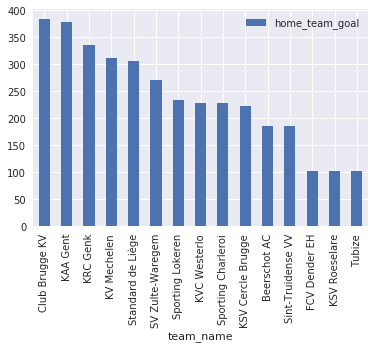

In [36]:
# Plot bar chart to visualize
team_home_goals.plot(kind='bar');

In [37]:
# Get data for team with most home goals
df_home_goals = df.query('team_name == "Club Brugge KV"')
df_home_goals

,country_name,league_name,team_name,dates,build_up_play_speed,chance_creation_passing,passing_class,chance_creation_crossing,crossing_class,chance_creation_shooting,shooting_class,home_team_goal,away_team_goal
24770,Belgium,Belgium Jupiler League,Club Brugge KV,2010-02-22 00:00:00,70,70,Risky,70,Lots,50,Normal,4,1
24784,Belgium,Belgium Jupiler League,Club Brugge KV,2010-02-22 00:00:00,70,70,Risky,70,Lots,50,Normal,1,1
24798,Belgium,Belgium Jupiler League,Club Brugge KV,2010-02-22 00:00:00,70,70,Risky,70,Lots,50,Normal,3,0
24812,Belgium,Belgium Jupiler League,Club Brugge KV,2010-02-22 00:00:00,70,70,Risky,70,Lots,50,Normal,1,4
24840,Belgium,Belgium Jupiler League,Club Brugge KV,2010-02-22 00:00:00,70,70,Risky,70,Lots,50,Normal,2,0
24849,Belgium,Belgium Jupiler League,Club Brugge KV,2010-02-22 00:00:00,70,70,Risky,70,Lots,50,Normal,3,1
24859,Belgium,Belgium Jupiler League,Club Brugge KV,2010-02-22 00:00:00,70,70,Risky,70,Lots,50,Normal,0,2
24876,Belgium,Belgium Jupiler League,Club Brugge KV,2010-02-22 00:00:00,70,70,Risky,70,Lots,50,Normal,2,1
24923,Belgium,Belgium Jupiler League,Club Brugge KV,2010-02-22 00:00:00,70,70,Risky,70,Lots,50,Normal,3,2
24941,Belgium,Belgium Jupiler League,Club Brugge KV,2010-02-22 00:00:00,70,70,Risky,70,Lots,50,Normal,2,3


In [38]:
# Get number of rows and columns
df_home_goals.shape

(138, 13)

In [39]:
# Get total number of chances created by each passing technique
total_passing_chances = df_home_goals.sum().chance_creation_passing
total_crossing_chances = df_home_goals.sum().chance_creation_crossing
total_shooting_chances = df_home_goals.sum().chance_creation_shooting
total_passing_chances, total_crossing_chances, total_shooting_chances

(7038, 8211, 7728)

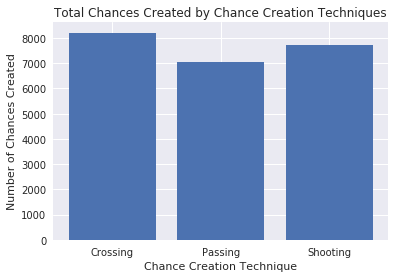

In [40]:
# Plot bar chart to see total chances created by each technique and differences
plt.bar(['Crossing', 'Passing', 'Shooting'], [total_crossing_chances, total_passing_chances, total_shooting_chances])
plt.title('Total Chances Created by Chance Creation Techniques')
plt.xlabel('Chance Creation Technique')
plt.ylabel('Number of Chances Created');

In [41]:
# Get the number of chances created per shooting class
crossing_per_class = df_home_goals.groupby('crossing_class').sum().chance_creation_crossing
crossing_per_class

crossing_class
Lots      1610
Normal    6601
Name: chance_creation_crossing, dtype: int64

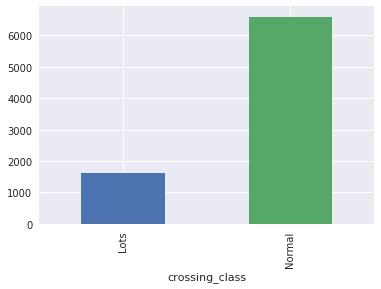

In [42]:
# Plot bar chart to visualize crossing creation classes
crossing_per_class.plot(kind="bar");

In [43]:
# Get the number of chances created per passing class
passing_per_class = df_home_goals.groupby('passing_class').sum().chance_creation_passing
passing_per_class

passing_class
Normal    5428
Risky     1610
Name: chance_creation_passing, dtype: int64

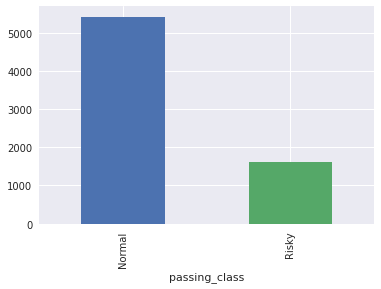

In [44]:
# Plot bar chart to see crossing creation classes
passing_per_class.plot(kind="bar");

In [45]:
# Get the number of chances created per shooting class
shooting_per_class = df_home_goals.groupby('shooting_class').sum().chance_creation_shooting
shooting_per_class

shooting_class
Lots      3312
Normal    4416
Name: chance_creation_shooting, dtype: int64

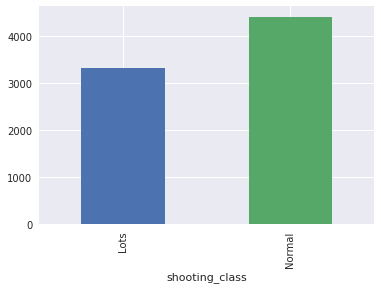

In [46]:
# Plot bar chart to see crossing creation classes
shooting_per_class.plot(kind="bar");

In [47]:
# Find the correlation coefficient between home team goals and chance creation techniques
df.corrwith(df['home_team_goal'])

build_up_play_speed        -0.002296
chance_creation_passing    -0.054196
chance_creation_crossing    0.024350
chance_creation_shooting   -0.014803
home_team_goal              1.000000
away_team_goal             -0.192555
dtype: float64

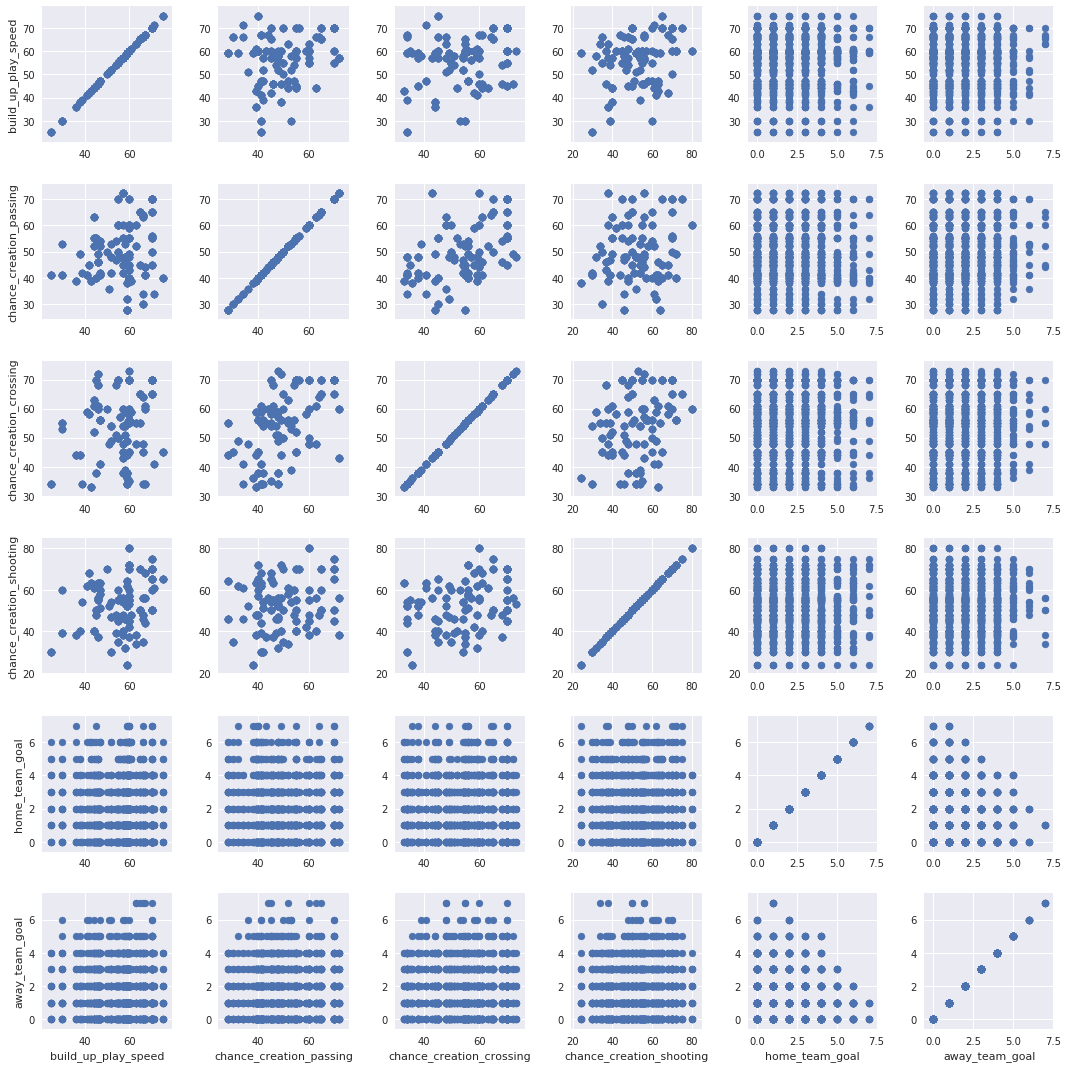

In [48]:
# Visualize relationships between variables in the data frame
sns.PairGrid(df).map(plt.scatter);

<div class="alert alert-block alert-info">
<b>EDA for QUESTION 1:</b>

The following were done in the preceeding cells:
1. The df was grouped by team name to get total home goals for each team and then get the highest
2. A bar chart was produced to visualize all home team goals for teams
3. Query was run to get all entries for team with the highest home goals
4. Total chances created through each passing technique were gotten and further subdivided into thier various classes
5. Bar charts were also produced for each class to aid with visualization
6. Correlation coefficient between home team goals and chance creation techniques was calculated.</div>

### Research Question 2: What features are associated with the best players?

In [49]:
# Get descriptive statistics on the player dataframe
df_player.describe()

,player_fifa_api_id,height,weight,player_fifa_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,...,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000
mean,170482.228046,181.491559,167.519401,147141.148400,67.603812,70.030633,55.501702,50.645337,57.721579,61.947583,...,59.960517,56.200136,47.268210,50.249830,47.343091,15.063989,17.411164,24.292716,16.752212,17.915589
std,53765.227778,6.472380,15.599612,41567.136501,6.410217,6.464303,16.700137,18.270266,15.890187,14.651514,...,14.768276,16.162095,18.861757,20.224107,19.794019,16.943326,16.076911,23.796196,15.777355,16.689126
min,5739.000000,162.560000,121.000000,9003.000000,41.000000,44.000000,9.000000,6.000000,8.000000,11.000000,...,17.000000,11.000000,8.000000,8.000000,9.000000,1.000000,5.000000,5.000000,5.000000,5.000000
25%,153184.000000,177.800000,157.000000,137425.000000,64.000000,66.000000,46.000000,37.000000,52.000000,56.000000,...,52.000000,48.000000,29.000000,31.000000,25.000000,8.000000,8.000000,7.000000,9.000000,9.000000
50%,185004.000000,182.880000,168.000000,147777.000000,68.000000,70.000000,59.000000,54.000000,61.000000,66.000000,...,64.000000,58.000000,52.000000,55.000000,53.000000,10.000000,13.000000,13.000000,11.000000,13.000000
75%,207677.000000,185.420000,181.000000,179591.000000,72.000000,75.000000,68.000000,65.000000,67.000000,72.000000,...,72.000000,68.000000,63.000000,67.000000,65.000000,13.000000,20.000000,47.000000,20.000000,20.000000
max,231226.000000,193.040000,196.000000,208966.000000,86.000000,91.000000,85.000000,88.000000,90.000000,90.000000,...,85.000000,88.000000,85.000000,85.000000,82.000000,83.000000,77.000000,83.000000,79.000000,83.000000


In [50]:
# Get overall average rating for all players in descending order
df_player.groupby(['player_name']).mean()[['overall_rating']].sort_values('overall_rating', ascending=False)

,overall_rating
player_name,
Franco Di Santo,79.680000
Franco Brienza,78.857143
Fabio Quagliarella,77.517241
Dudu,76.318182
Tobias Kempe,75.666667
Ricardo Oliveira,73.760000
Jerry Vandam,73.318182
Edinho,72.911765
Tomas Micola,72.833333


In [51]:
# Top player above 75% with a rating of 72 and above
df_best_players = df_player.query('overall_rating >= 72')
df_best_players

,player_name,player_fifa_api_id,birthday,height,weight,player_fifa_api_id,date,overall_rating,potential,preferred_foot,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
6,Dragan Paljic,182740,1983-04-08 00:00:00,175.26,159,110809,2009-08-30 00:00:00,73,77,left,...,60.0,68.0,79.0,78.0,69.0,8.0,21.0,73.0,21.0,21.0
8,Dragan Paljic,182740,1983-04-08 00:00:00,175.26,159,110809,2007-08-30 00:00:00,72,76,left,...,60.0,51.0,77.0,77.0,69.0,8.0,21.0,71.0,21.0,21.0
10,Tobias Kempe,199413,1989-06-27 00:00:00,182.88,170,138810,2015-09-21 00:00:00,77,77,right,...,73.0,78.0,34.0,24.0,47.0,9.0,11.0,9.0,16.0,12.0
11,Tobias Kempe,199413,1989-06-27 00:00:00,182.88,170,138810,2015-05-29 00:00:00,76,76,right,...,72.0,77.0,33.0,23.0,46.0,8.0,10.0,8.0,15.0,11.0
12,Tobias Kempe,199413,1989-06-27 00:00:00,182.88,170,138810,2015-03-20 00:00:00,76,76,right,...,72.0,77.0,33.0,23.0,46.0,8.0,10.0,8.0,15.0,11.0
13,Tobias Kempe,199413,1989-06-27 00:00:00,182.88,170,138810,2015-03-06 00:00:00,76,76,right,...,72.0,77.0,33.0,23.0,46.0,8.0,10.0,8.0,15.0,11.0
14,Tobias Kempe,199413,1989-06-27 00:00:00,182.88,170,138810,2015-01-09 00:00:00,76,76,right,...,72.0,77.0,33.0,23.0,46.0,8.0,10.0,8.0,15.0,11.0
15,Tobias Kempe,199413,1989-06-27 00:00:00,182.88,170,138810,2014-09-18 00:00:00,76,76,right,...,72.0,77.0,33.0,23.0,46.0,8.0,10.0,8.0,15.0,11.0
16,Tobias Kempe,199413,1989-06-27 00:00:00,182.88,170,138810,2014-02-28 00:00:00,76,76,right,...,72.0,77.0,33.0,23.0,46.0,8.0,10.0,8.0,15.0,11.0
17,Tobias Kempe,199413,1989-06-27 00:00:00,182.88,170,138810,2013-09-20 00:00:00,75,75,right,...,69.0,77.0,33.0,23.0,46.0,8.0,10.0,8.0,15.0,11.0


In [52]:
# Get number of rows and columns in the data frame
df_best_players.shape

(410, 45)

In [53]:
# Explore top players and their attributes for df_player
df_best_players.describe()

,player_fifa_api_id,height,weight,player_fifa_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,...,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,168530.378049,180.191317,168.095122,150578.539024,74.941463,76.687805,63.107317,62.848780,62.341463,70.890244,...,69.268293,64.573171,44.921951,47.934146,44.209756,11.936585,15.078049,22.565854,14.141463,14.753659
std,53831.068770,7.302451,16.726572,32954.158399,2.794771,4.260479,14.623664,15.625087,13.128497,11.063946,...,11.204095,15.124932,19.221874,22.404550,20.479936,11.853667,11.675681,25.269149,10.806115,12.654726
min,5739.000000,162.560000,121.000000,9003.000000,72.000000,64.000000,14.000000,6.000000,11.000000,21.000000,...,25.000000,11.000000,11.000000,9.000000,10.000000,2.000000,5.000000,5.000000,6.000000,5.000000
25%,157271.000000,175.260000,159.000000,138085.000000,73.000000,74.000000,52.000000,54.250000,55.000000,70.000000,...,67.000000,56.000000,29.000000,28.000000,25.250000,8.000000,10.000000,7.000000,9.000000,9.000000
50%,184457.000000,182.880000,170.000000,147455.000000,74.000000,76.000000,68.500000,67.000000,63.000000,74.000000,...,73.000000,70.000000,42.000000,45.000000,36.000000,10.000000,13.000000,11.000000,11.000000,12.000000
75%,199413.000000,185.420000,183.000000,181483.000000,76.000000,79.000000,74.000000,73.000000,71.000000,77.000000,...,75.000000,75.750000,60.000000,74.000000,65.000000,12.000000,15.000000,14.000000,15.000000,15.000000
max,231226.000000,193.040000,196.000000,199964.000000,86.000000,91.000000,85.000000,88.000000,87.000000,90.000000,...,85.000000,88.000000,85.000000,85.000000,82.000000,83.000000,77.000000,83.000000,79.000000,83.000000


In [54]:
# Find the correlation between the overall rating and other player attributes of the best players 
df_best_players.corrwith(df_best_players['overall_rating'])

player_fifa_api_id   -0.033780
height               -0.073458
weight                0.004984
player_fifa_api_id   -0.077129
overall_rating        1.000000
potential             0.738709
crossing              0.383027
finishing             0.493626
heading_accuracy     -0.069756
short_passing         0.346916
volleys               0.344029
dribbling             0.480077
curve                 0.348869
free_kick_accuracy    0.414112
long_passing          0.308452
ball_control          0.477877
acceleration          0.472692
sprint_speed          0.452611
agility               0.443543
reactions             0.450135
balance               0.316461
shot_power            0.415009
jumping              -0.071066
stamina               0.056188
strength             -0.214001
long_shots            0.474278
aggression           -0.056426
interceptions        -0.109489
positioning           0.475147
vision                0.502105
penalties             0.366352
marking              -0.300106
standing

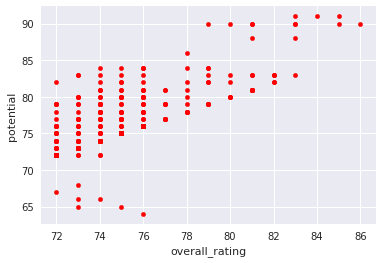

In [55]:
# Plot scatter for player potential and overall rating
ax1 = df_best_players.plot(kind='scatter', x='overall_rating', y='potential', color='r')    


True


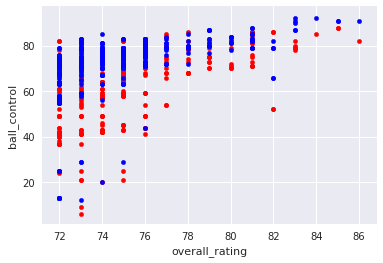

In [56]:
# Plot scatter for overall_rating, finishing, ball control, dribbling 
ax1 = df_best_players.plot(kind='scatter', x='overall_rating', y='finishing', color='r')    
ax2 = df_best_players.plot(kind='scatter', x='overall_rating', y='ball_control', color='b', ax=ax1)
print(ax1 == ax2)

True


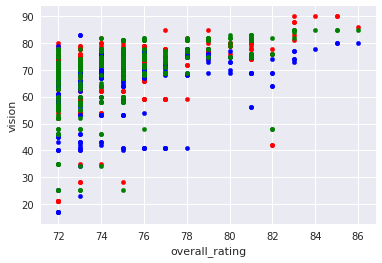

In [57]:
# Plot scatter for overall_rating, short passing and long passing
ax1 = df_best_players.plot(kind='scatter', x='overall_rating', y='short_passing', color='r')    
ax2 = df_best_players.plot(kind='scatter', x='overall_rating', y='long_passing', color='b', ax=ax1)
ax3 = df_best_players.plot(kind='scatter', x='overall_rating', y='vision', color='g', ax=ax1)
print(ax1 == ax2 == ax3)

True


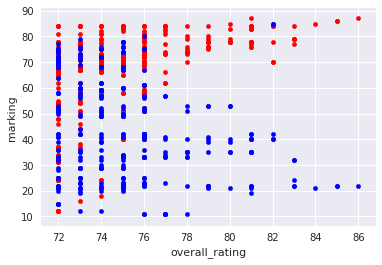

In [58]:
# Plot scatter for overall_rating, attacking work rate and defensive work rate
ax1 = df_best_players.plot(kind='scatter', x='overall_rating', y='positioning', color='r')    
ax2 = df_best_players.plot(kind='scatter', x='overall_rating', y='marking', color='b', ax=ax1)

print(ax1 == ax2)

True


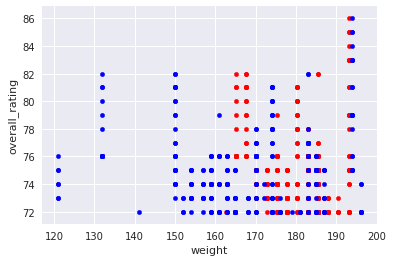

In [59]:
# Plot scatter for height and weight against players overall career performance. 
ax1 = df_best_players.plot(kind='scatter', x='height', y='overall_rating', color='r')    
ax2 = df_best_players.plot(kind='scatter', x='weight', y='overall_rating', color='b', ax=ax1)
print(ax1 == ax2)

In [60]:
# Find the correlation coefficient between home team goals and chance creation techniques
df.corrwith(df['home_team_goal'])

build_up_play_speed        -0.002296
chance_creation_passing    -0.054196
chance_creation_crossing    0.024350
chance_creation_shooting   -0.014803
home_team_goal              1.000000
away_team_goal             -0.192555
dtype: float64

<div class="alert alert-block alert-info">
<b>EDA summary for df_players:</b>

The Player table has been successfully cleaned.
1. Descriptive statistics were gotten for the data frame
2. Average of overall player rating for each player was calculated and sorted in descending order.
3. Players with an overall rating of equal or greater than 72 were selected as the best players.
4. Correlation coefficient between over all rating for best players and player attributes were calculated
5. Scatter plots for relationships between overall ratings and player attributes.</div>

### Conclusion 1

**Research Question 1: Find the team with the highest home goals and which chance creation techniques they use.**

**FINDINGS**

1. The team with the highest home goals is Club Brugge KV with	384 goals

2. The teams use 3 chance creation techniques; Crossing, Passing and Shooting

3. Club Brugge KV created a total of 7038 passing chances, 8211 crossing chances and 7728 shooting chances

4. For the Crossing chances they can be further subdivided into:
  - Lots      1610
  - Normal    6601

5. For the Passing chances they can be further subdivided into:
  - Normal    5428
  - Risky     1610

6. For the Shooting chances they can be further subdivided into:
  - Lots      3312
  - Normal    4416

7. The correlation coefficient home team goals and all 3 chance creation techniques is low.


**LIMITATIONS** 

1. The data frame df has alot of null values which limits the scope of the data.

2. Only the Belgian league is explored after all the null and duplicate values are removed from the data frame. 




### Conclusion 2

**Research Question 2: What features are associated with the best players?**

**FINDINGS**

1. The players classified as the best here are those with an average of 75% rating or more. From our statistics it shows players with 72 or more overall rating fall into this category

2. A total of 410 players fall into this category. To get their attributes, we run df_best_players.describe() to get all the statistics and attributes that make them the best

3. The correlation between the overall_rating and other attributes was calculated. Potential has the strongest correlation coefficient with overall rating

4. Those with moderate correlation are:

  - short_passing         
  - volleys               
  - dribbling             
  - curve                 
  - free_kick_accuracy    
  - long_passing          
  - ball_control          
  - acceleration          
  - sprint_speed          
  - agility               
  - reactions             
  - balance              
  - shot_power
  - long shots
  - positioning
  - vision
  - penalties
  - sliding_tackle
  
  
 5. Those with a weak correlation are:
 
  - aggression           
  - interceptions        
  - standing_tackle      
  - gk_diving            
  - gk_handling          
  - gk_kicking           
  - gk_positioning       
  - gk_reflexes          
 

**LIMITATION**

1. The df_player data frame had rows that were dropped because of the null values

2. Some players had more than one overall_rating for the same year with difference entries.

In [61]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0